Исследуем, есть ли взаимосвязь между такими параметрами, как число одинаковых номеров рейса, число рейсов из аэропорта, число рейсов в день недели, уникальнымии маршрутами/временем в воздухе/числом рейсов авиакомании, и суммарным, максимальным, медианным временем задержек и стандартным отклонением.
Естесственно предположить, что сравнительно высокая и низкая интенсивности будут влиять на большее время задержки, а также интересно проследить зависимость между распредлением времени задержек по дням недели, как число уникальных рейсов может на это влиять и т.д.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sb

In [67]:
df = pd.read_csv('flights.csv', dtype=str)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df.isna().any(axis=0)
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]

In [69]:
pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.drop(columns=['YEAR', 'MONTH', 'DAY'])
cols = list(df.columns)
cols[-1:] + cols[:-1]
df = df[cols[-1:] + cols[:-1]]
df.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,0005,2354,-11,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,4,US,840,N171US,SFO,CLT,0020,0018,-2,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,0025,0024,-1,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) &
            (df.DESTINATION_AIRPORT.apply(len) == 3)]

In [71]:
df['FLIGHT_NUMBER'].value_counts().head(15)

469    3596
327    3213
326    3150
403    3089
667    3025
223    3016
407    2979
761    2965
188    2957
604    2943
315    2939
404    2924
657    2919
719    2917
61     2906
Name: FLIGHT_NUMBER, dtype: int64

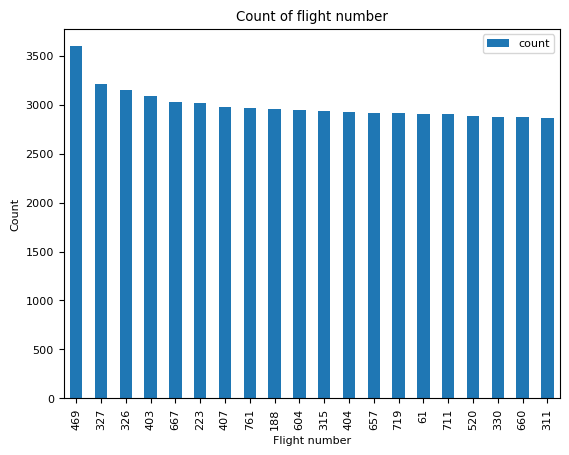

In [72]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.FLIGHT_NUMBER.value_counts()[:20].plot(title='Count of flight number',xlabel='Flight number', ylabel='Count', kind='bar')
plt.legend(['count'])
plt.show()

In [73]:
df.DEPARTURE_DELAY = df.DEPARTURE_DELAY.astype(float)

#df.groupby('FLIGHT_NUMBER')['DEPARTURE_DELAY'].agg(lambda x: x[x>0].sum()).sort_values(ascending=False)

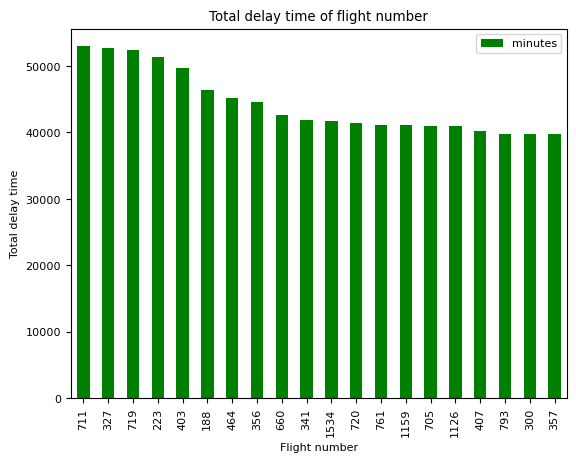

In [74]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
df.groupby('FLIGHT_NUMBER')['DEPARTURE_DELAY'].agg(lambda x: x[x>0].sum()).sort_values(ascending=False).head(20).plot(title='Total delay time of flight number',xlabel='Flight number', ylabel='Total delay time',kind='bar',color='green')
plt.legend(['minutes'])
plt.show()

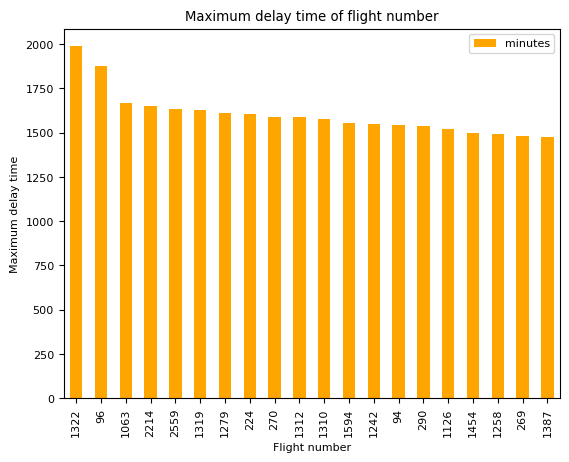

In [75]:
df.groupby('FLIGHT_NUMBER')['DEPARTURE_DELAY'].max().sort_values(ascending=False).head(20).plot(title='Maximum delay time of flight number',xlabel='Flight number', ylabel='Maximum delay time',kind='bar',color='orange')
plt.legend(['minutes'])
plt.show()

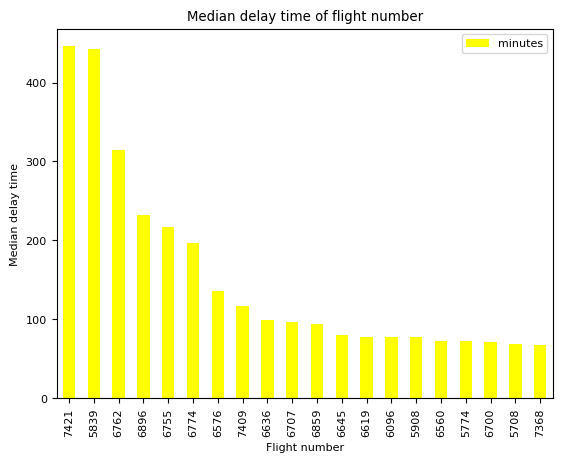

In [76]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
df.groupby('FLIGHT_NUMBER')['DEPARTURE_DELAY'].agg(lambda x: x[x>0].median()).sort_values(ascending=False).head(20).plot(title='Median delay time of flight number',xlabel='Flight number', ylabel='Median delay time',kind='bar',color='yellow')
plt.legend(['minutes'])
plt.show()


In [77]:
#plt.figure(figsize = (24, 16))
#plt.title('Correlation')
#ax = sb.heatmap(xx.corr(), annot=True, linewidths=3, linecolor='black')
x1=df.groupby('FLIGHT_NUMBER',sort=False)['DEPARTURE_DELAY'].agg(lambda x: x[x>0].sum()).head(3000)
x1=np.transpose(x1)
x2=df['FLIGHT_NUMBER'].value_counts(sort=False).head(3000)
x2=np.transpose(x2)
x3=df.groupby('FLIGHT_NUMBER',sort=False)['DEPARTURE_DELAY'].agg(lambda x: x[x>0].median()).head(3000)
x3=np.transpose(x3)
x4=df.groupby('FLIGHT_NUMBER',sort=False)['DEPARTURE_DELAY'].agg(lambda x: x[x>0].std()).head(3000)
x4=np.transpose(x4)

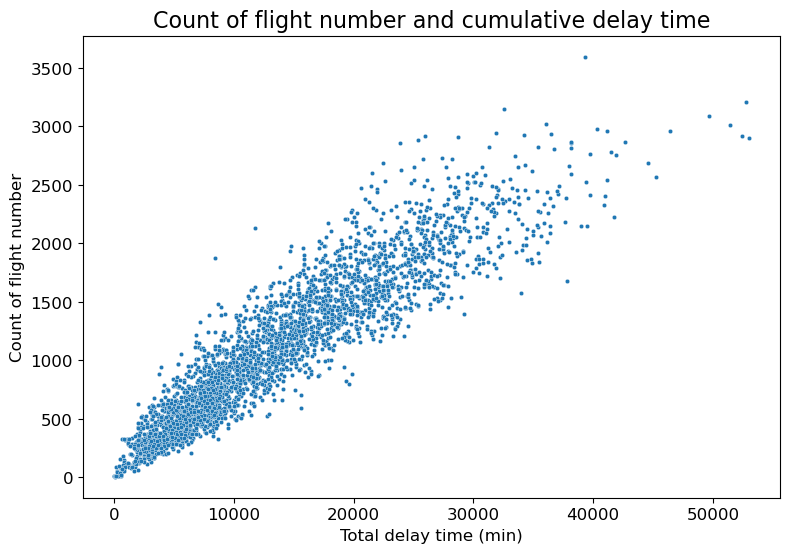

In [78]:
import seaborn as sb
plt.figure(figsize = (9, 6))
plt.rcParams['font.size'] = '12'
correl = sb.scatterplot(x=x1.values, y=x2.values, s=10)

# Set label for x-axis 
correl.set_xlabel( "Total delay time (min)" , size = 12 ) 
  
# Set label for y-axis 
correl.set_ylabel( "Count of flight number" , size = 12 ) 
  
# Set title for plot 
correl.set_title( "Count of flight number and cumulative delay time" , size = 16 ) 

plt.show()

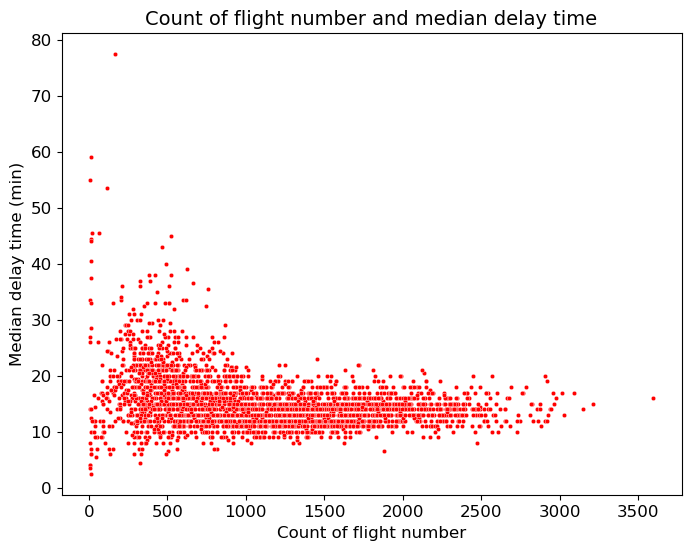

In [79]:
#import seaborn as sb
#plt.figure(figsize = (8, 6))
#plt.rcParams['font.size'] = '8'
#correl = sb.scatterplot(x=xx.index.values, y=xx.values)

#plt.show()

plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = '12'
correl = sb.scatterplot(x=x2.values, y=x3.values, s=10, c='red')

# Set label for x-axis 
correl.set_xlabel( "Count of flight number" , size = 12 ) 
  
# Set label for y-axis 
correl.set_ylabel( "Median delay time (min)" , size = 12 ) 
  
# Set title for plot 
correl.set_title( "Count of flight number and median delay time" , size = 14 ) 

plt.show()

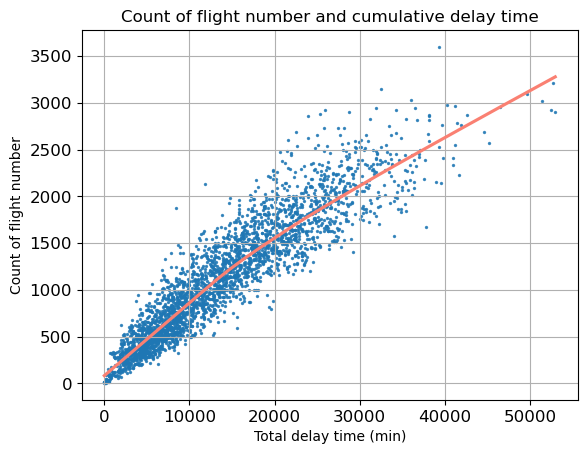

In [80]:
graph= sb.regplot(x=x1.values, y=x2.values, lowess=True, scatter_kws={'s':2},line_kws={"color": "salmon"})

# Set label for x-axis 
graph.set_xlabel( "Total delay time (min)" , size = 10 ) 
  
# Set label for y-axis 
graph.set_ylabel( "Count of flight number" , size = 10 ) 
  
# Set title for plot 
graph.set_title( "Count of flight number and cumulative delay time" , size = 12 ) 
graph.grid ( True )

Text(0.5, 1.0, 'Flights of the same name and median delay time')

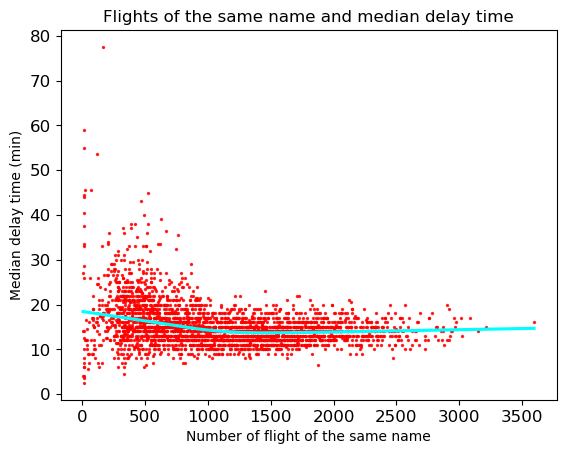

In [81]:
graph= sb.regplot(x=x2.values, y=x3.values, lowess=True, scatter_kws={'s':2, "color": "red"},line_kws={"color": "aqua"})

# Set label for x-axis 
graph.set_xlabel( 'Number of flight of the same name' , size = 10 ) 
  
# Set label for y-axis 
graph.set_ylabel( "Median delay time (min)" , size = 10 ) 
  
# Set title for plot 
graph.set_title( "Flights of the same name and median delay time" , size = 12 ) 

Text(0.5, 1.0, 'Flights of the same name and std delay time')

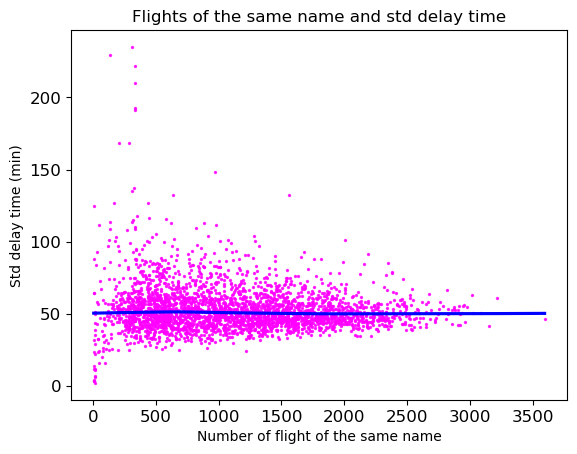

In [82]:
graph= sb.regplot(x=x2.values, y=x4.values, lowess=True, scatter_kws={'s':2, "color": "magenta"},line_kws={"color": "blue"})
# Set label for x-axis 
graph.set_xlabel( 'Number of flight of the same name' , size = 10 ) 
  
# Set label for y-axis 
graph.set_ylabel( "Std delay time (min)" , size = 10 ) 
  
# Set title for plot 
graph.set_title( "Flights of the same name and std delay time" , size = 12 ) 

In [83]:
x_1=df.groupby('ORIGIN_AIRPORT',sort=False)['DEPARTURE_DELAY'].agg(lambda x: x[x>0].sum())
x_1=np.transpose(x_1)
x_2=df['ORIGIN_AIRPORT'].value_counts(sort=False)
x_2=np.transpose(x_2)
x_3=df.groupby('ORIGIN_AIRPORT',sort=False)['DEPARTURE_DELAY'].agg(lambda x: x[x>0].median())
x_3=np.transpose(x_3)
x_4=df.groupby('ORIGIN_AIRPORT',sort=False)['DEPARTURE_DELAY'].agg(lambda x: x[x>0].mean())
x_4=np.transpose(x_4)

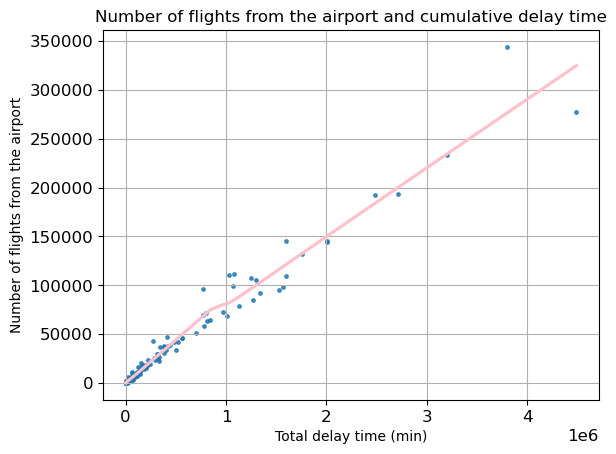

In [84]:
graph= sb.regplot(x=x_1.values, y=x_2.values, lowess=True, scatter_kws={'s':6},line_kws={"color": 'pink'})

# Set label for x-axis 
graph.set_xlabel( "Total delay time (min)" , size = 10 ) 
  
# Set label for y-axis 
graph.set_ylabel( "Number of flights from the airport" , size = 10 ) 
  
# Set title for plot 
graph.set_title( "Number of flights from the airport and cumulative delay time" , size = 12 ) 
graph.grid ( True )

Text(0.5, 1.0, 'Number of flights from the airport and median delay time')

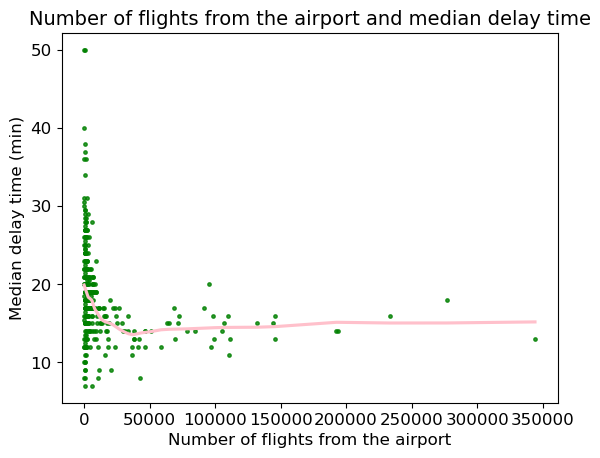

In [85]:
graph= sb.regplot(x=x_2.values, y=x_3.values,  lowess=True, scatter_kws={'s':6, "color": "green"},line_kws={"color": "pink"})

# Set label for x-axis 
graph.set_xlabel( 'Number of flights from the airport' , size = 12 ) 
  
# Set label for y-axis 
graph.set_ylabel( "Median delay time (min)" , size = 12 ) 
  
# Set title for plot 
graph.set_title( "Number of flights from the airport and median delay time" , size = 14 ) 

Text(0.5, 1.0, 'Number of flights from the airport and mean delay time')

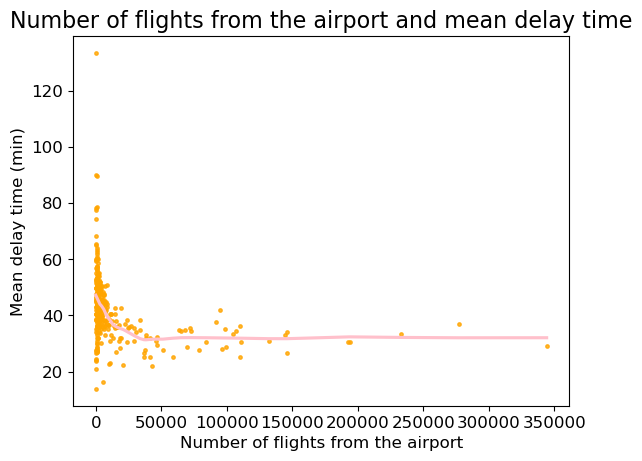

In [86]:
graph= sb.regplot(x=x_2.values, y=x_4.values, lowess=True, scatter_kws={'s':6, "color": "orange"},line_kws={"color": "pink"})
# Set label for x-axis 
graph.set_xlabel( 'Number of flights from the airport' , size = 12 ) 
  
# Set label for y-axis 
graph.set_ylabel( "Mean delay time (min)" , size = 12 ) 
  
# Set title for plot 
graph.set_title( "Number of flights from the airport and mean delay time" , size = 16) 


In [87]:
df['AIRLINE'].value_counts(sort=False)

AS     157268
AA     638313
US     194586
DL     796418
NK     105198
UA     463158
HA      69863
B6     240906
OO     529394
EV     511186
F9      82142
WN    1140890
MQ     257726
VX      55924
Name: AIRLINE, dtype: int64

In [88]:
df['ROUTE'] = df['ORIGIN_AIRPORT'] + df['DESTINATION_AIRPORT']
d0=df.groupby('AIRLINE',sort=False)['ROUTE'].nunique() #маршрутов на компанию
d0=np.transpose(d0)
d1=df['AIRLINE'].value_counts(sort=False) #всего рейсов на компанию
d1=np.transpose(d1)
df.AIR_TIME = df.AIR_TIME.astype(float)
d2=df.groupby('AIRLINE',sort=False)['AIR_TIME'].agg(lambda x: x[x>0].sum()) #время в воздухе на компанию
d2=np.transpose(d2)
d3=df.groupby('AIRLINE',sort=False)['DEPARTURE_DELAY'].agg(lambda x: x[x>0].median())
d3=np.transpose(d3)
d4=df.groupby('AIRLINE',sort=False)['DEPARTURE_DELAY'].agg(lambda x: x[x>0].mean())
d4=np.transpose(d4)
d5=df.groupby('AIRLINE',sort=False)['DEPARTURE_DELAY'].agg(lambda x: x[x>0].std())
d5=np.transpose(d5)

Text(0.5, 1.0, 'Number of airline routes and median delay time')

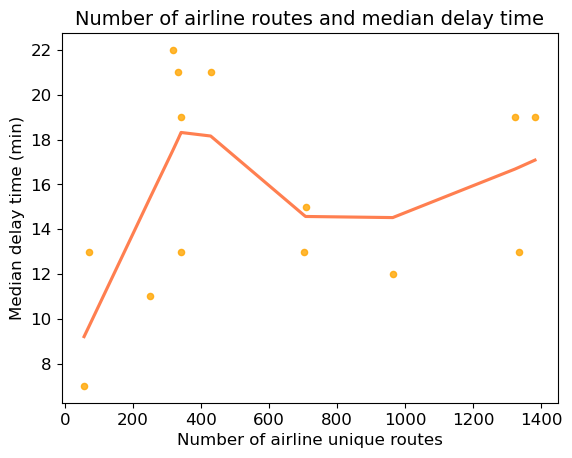

In [89]:
graph= sb.regplot(x=d0.values, y=d3.values, lowess=True, scatter_kws={'s':20, "color": "orange"},line_kws={"color": "coral"})
# Set label for x-axis 
graph.set_xlabel( 'Number of airline unique routes' , size = 12 ) 
  
# Set label for y-axis 
graph.set_ylabel( 'Median delay time (min)' , size = 12 ) 
  
# Set title for plot 
graph.set_title( 'Number of airline routes and median delay time' , size = 14 ) 

Text(0.5, 1.0, 'Number of airline flights and median delay time ')

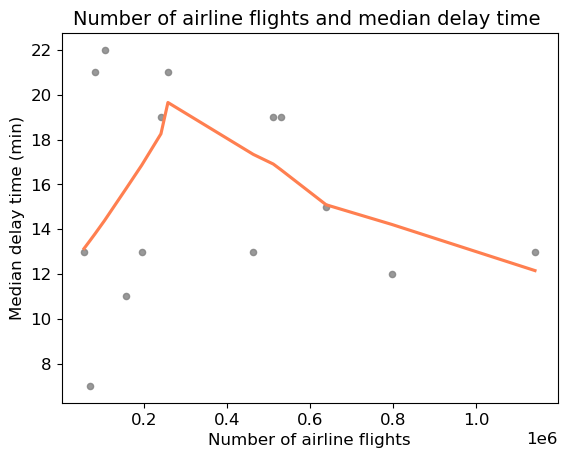

In [90]:
graph= sb.regplot(x=d1.values, y=d3.values, lowess=True, scatter_kws={'s':20, "color": "grey"},line_kws={"color": "coral"})
# Set label for x-axis 
graph.set_xlabel( 'Number of airline flights' , size = 12 ) 
  
# Set label for y-axis 
graph.set_ylabel( 'Median delay time (min)' , size = 12 ) 
  
# Set title for plot 
graph.set_title( 'Number of airline flights and median delay time ' , size = 14 ) 

Text(0.5, 1.0, 'Total time in air and median delay time ')

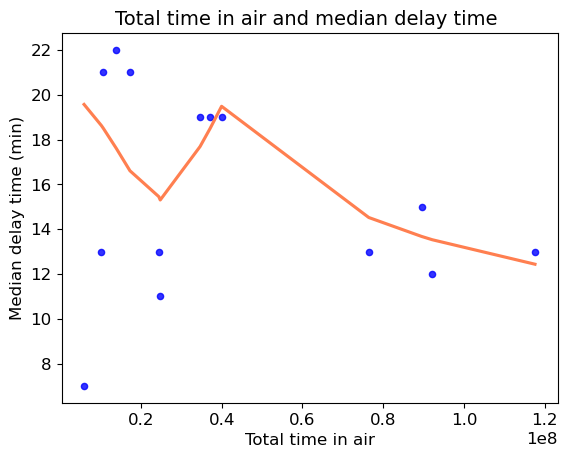

In [91]:
graph= sb.regplot(x=d2.values, y=d3.values, lowess=True, scatter_kws={'s':20, "color": "blue"},line_kws={"color": "coral"})
# Set label for x-axis 
graph.set_xlabel( 'Total time in air' , size = 12 ) 
  
# Set label for y-axis 
graph.set_ylabel( 'Median delay time (min)' , size = 12 ) 
  
# Set title for plot 
graph.set_title( 'Total time in air and median delay time ' , size = 14 ) 

Text(0.5, 1.0, 'Number of airline unique routes and std delay time ')

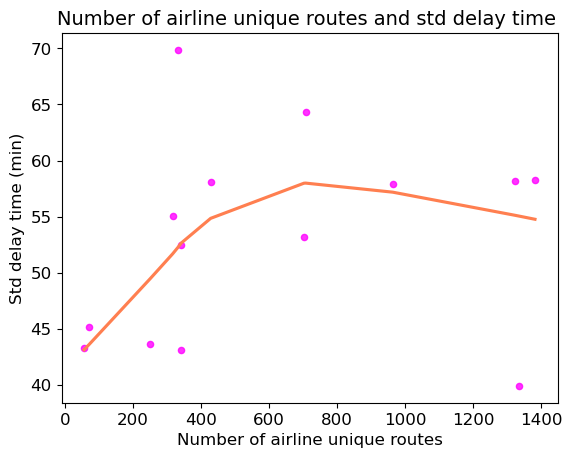

In [92]:
graph= sb.regplot(x=d0.values, y=d5.values, lowess=True, scatter_kws={'s':20, "color": "fuchsia"},line_kws={"color": "coral"})
# Set label for x-axis 
graph.set_xlabel( 'Number of airline unique routes' , size = 12 ) 
  
# Set label for y-axis 
graph.set_ylabel( 'Std delay time (min)' , size = 12 ) 
  
# Set title for plot 
graph.set_title( 'Number of airline unique routes and std delay time ' , size = 14 ) 

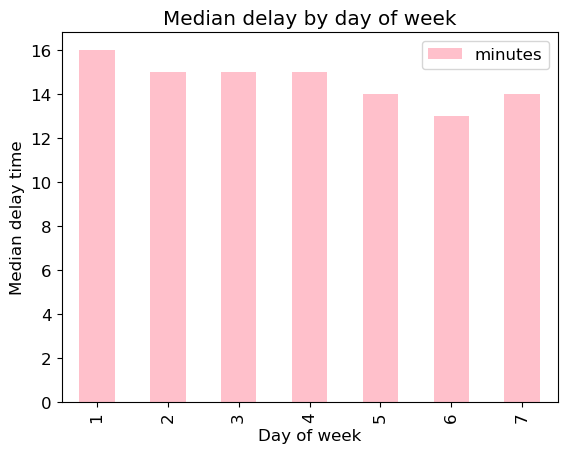

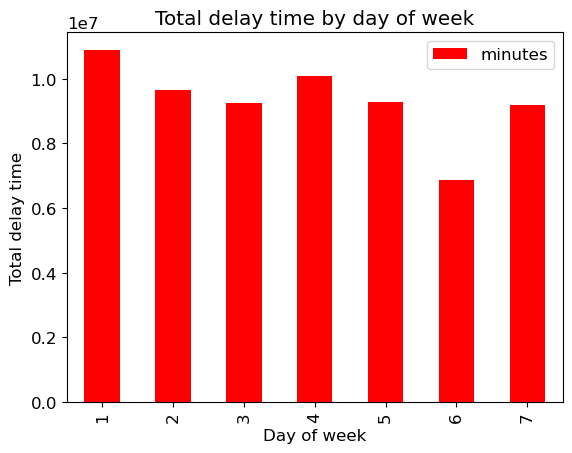

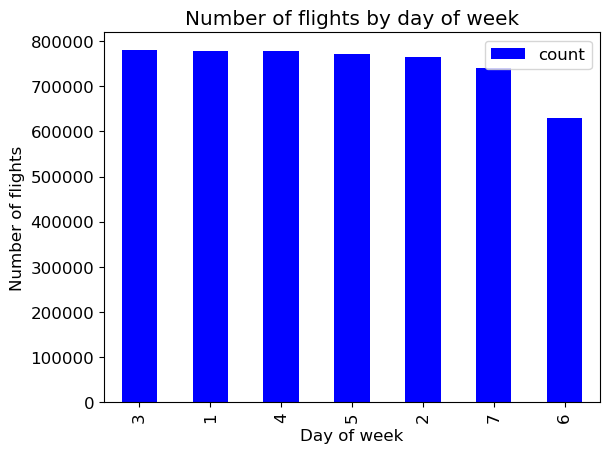

In [93]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].agg(lambda x: x[x>0].median()).plot(title='Median delay by day of week',xlabel='Day of week', ylabel='Median delay time',kind='bar',color='pink')
plt.legend(['minutes'])
plt.show()

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].agg(lambda x: x[x>0].sum()).plot(title='Total delay time by day of week',xlabel='Day of week', ylabel='Total delay time',kind='bar',color='red')
plt.legend(['minutes'])
plt.show()

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
df['DAY_OF_WEEK'].value_counts().sort_values(ascending=False).plot(title='Number of flights by day of week',xlabel='Day of week', ylabel='Number of flights',kind='bar',color='blue')
plt.legend(['count'])
plt.show()

In [94]:
d_1=df.groupby('DAY_OF_WEEK',sort=False)['DEPARTURE_DELAY'].agg(lambda x: x[x>0].median())
d_1=np.transpose(d_1)
d_2=df['DAY_OF_WEEK'].value_counts(sort=False)
d_2=np.transpose(d_2)

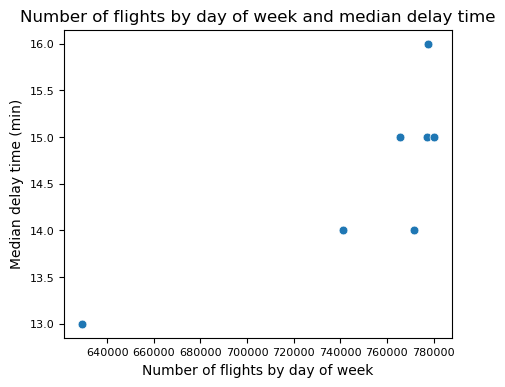

In [95]:
plt.figure(figsize = (5, 4))
plt.rcParams['font.size'] = '8'
correl = sb.scatterplot(x=d_2.values, y=d_1.values, s=40)

# Set label for x-axis 
correl.set_xlabel( "Number of flights by day of week" , size = 10 ) 
  
# Set label for y-axis 
correl.set_ylabel( "Median delay time (min)" , size = 10 ) 
  
# Set title for plot 
correl.set_title( "Number of flights by day of week and median delay time" , size = 12 ) 

plt.show()

Число одинаковых рейсов.
Чем выше число одинаковых рейсов, тем в пропорции выше суммарное время задержки. То есть наиболее частые рейсы склонны в совокупности задерживаться больше. Это разрешить можно путём большего обращения внимания на данные рейсы (например, закреплять за ними отдельные обслуживающие команды и строгие рабочие интервалы на это, то есть по возможности автоматизировать все процессы, происходящие с рейсом).
Также мы видим, что у одинаковых рейсов с малым числом повторений медианное время задержки относительно велико. Естественно предполагать, что сказывается как раз их низкая частота, поэтому стоило бы провести работу над организацией вылетов в срок, проработать их организацию и обслуживание.

Теперь касательно числа рейсов из аэропорта.
Графики демонстрируют, что чуть выше десятка аэропортов с самым большим числом рейсов имеют большее совокупное время задержек (больше пропорционально аэропортам с меньшим числом рейсов). Средством к решению является строительство/расширение/модернизация больших аэропортов, перенаправление части рейсов в другие аэропорты.
Как и в случае, с числом одинаковых рейсов, аэропорты с небольшим числом рейсов имеют наибольшие медианные и средние времена задержки. Данный вопрос тяжело понятным образом объяснить, но причиной тому может быть низкая аавтоматизация, нехватка инфраструктуры и отлаженности работы, тогда путём к решению может быть увеличение числа и качества персонала, инфраструктуры.

Авиакомпании.
4 авиакомпании с числом уникальных маршрутов от 300 до 500, а также 2 с наибольшим числом имеют очень большие медианные времена задержек. Кроме того, у них большие отклонения по времени задержек. Сокращение числа уникальных машрутов и концентрация на основных могли бы помочь исправить ситуацию, которая могла возникнуть из-за стремления превзойти конкурентов путём расширения географии полётов, что и привело к сбоям в рейсах.

Дни недели.
Видна явная зависимость между величиной суммарного времени задержки и медианной за конкретный день. Наибольшие медианные и суммарные задержки по времени наблюдаются в дни недели с наибольшим числом рейсов. Путём к решению может стать перераспределение части рейсов с понедельника и среды на субботу и воскресенье, увеличение числа сотрудников в дни с наибольшим числом рейсов.